In [1]:
import pandas as pd
import polars as pl
import numpy as np
import ops
import time

In [2]:
N = 10_000_000
np.random.seed(1234)  # set seed for reproducibility
arr = np.random.rand(N) * 1_000_000
df = pd.DataFrame({"x": arr})
df

,x
0,191519.450379
1,622108.771040
2,437727.739007
3,785358.583714
4,779975.808119
...,...
9999995,111155.366592
9999996,496823.104737
9999997,194689.621095
9999998,820116.286550


In [3]:
methods = ["nearest", "lower", "higher", "midpoint", "linear"]
window = 100
q = 0.2

In [4]:
t1 = time.time()
for method in methods:
    df[f"pd_q{q}_{method}"] = (
        df["x"].rolling(window=window).quantile(q, interpolation=method)
    )
print("Pandas rolling quantile time:", time.time() - t1)
df

Pandas rolling quantile time: 12.859659671783447


,x,pd_q0.2_nearest,pd_q0.2_lower,pd_q0.2_higher,pd_q0.2_midpoint,pd_q0.2_linear
0,191519.450379,NaN,NaN,NaN,NaN,NaN
1,622108.771040,NaN,NaN,NaN,NaN,NaN
2,437727.739007,NaN,NaN,NaN,NaN,NaN
3,785358.583714,NaN,NaN,NaN,NaN,NaN
4,779975.808119,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
9999995,111155.366592,252467.256543,224727.882025,252467.256543,238597.569284,246919.381640
9999996,496823.104737,252467.256543,224727.882025,252467.256543,238597.569284,246919.381640
9999997,194689.621095,252467.256543,224727.882025,252467.256543,238597.569284,246919.381640
9999998,820116.286550,275551.196405,252467.256543,275551.196405,264009.226474,270934.408433


In [5]:
t1 = time.time()
for method in methods:
    df[f"q{q}_{method}"] = ops.rolling_quantile(
        arr,
        window=window,
        q=q,
        method=getattr(ops.QuantileMethod, method.capitalize()),
    )
print("Ops rolling quantile time:", time.time() - t1)
df

Ops rolling quantile time: 1.4846978187561035


,x,pd_q0.2_nearest,pd_q0.2_lower,pd_q0.2_higher,pd_q0.2_midpoint,pd_q0.2_linear,q0.2_nearest,q0.2_lower,q0.2_higher,q0.2_midpoint,q0.2_linear
0,191519.450379,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,622108.771040,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,437727.739007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,785358.583714,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,779975.808119,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
9999995,111155.366592,252467.256543,224727.882025,252467.256543,238597.569284,246919.381640,252467.256543,224727.882025,252467.256543,238597.569284,246919.381640
9999996,496823.104737,252467.256543,224727.882025,252467.256543,238597.569284,246919.381640,252467.256543,224727.882025,252467.256543,238597.569284,246919.381640
9999997,194689.621095,252467.256543,224727.882025,252467.256543,238597.569284,246919.381640,252467.256543,224727.882025,252467.256543,238597.569284,246919.381640
9999998,820116.286550,275551.196405,252467.256543,275551.196405,264009.226474,270934.408433,275551.196405,252467.256543,275551.196405,264009.226474,270934.408433


In [6]:
for method in methods:
    print(
        f"Method: {method}, Equals: {df[f'pd_q{q}_{method}'].equals(df[f'q{q}_{method}'])}"
    )

Method: nearest, Equals: True
Method: lower, Equals: True
Method: higher, Equals: True
Method: midpoint, Equals: True
Method: linear, Equals: True


In [7]:
pldf = pl.DataFrame({"x": arr})
t1 = time.time()
pldf = pldf.with_columns(
    [
        pldf["x"]
        .rolling_quantile(window_size=window, quantile=q, interpolation=method)
        .alias(f"pl_q{q}_{method}")
        for method in methods
    ]
)
print("Polars rolling quantile time:", time.time() - t1)
pldf

Polars rolling quantile time: 2.373037815093994


x,pl_q0.2_nearest,pl_q0.2_lower,pl_q0.2_higher,pl_q0.2_midpoint,pl_q0.2_linear
f64,f64,f64,f64,f64,f64
191519.450379,null,null,null,null,null
622108.77104,null,null,null,null,null
437727.739007,null,null,null,null,null
785358.583714,null,null,null,null,null
779975.808119,null,null,null,null,null
…,…,…,…,…,…
111155.366592,252467.256543,224727.882025,252467.256543,238597.569284,246919.38164
496823.104737,252467.256543,224727.882025,252467.256543,238597.569284,246919.38164
194689.621095,252467.256543,224727.882025,252467.256543,238597.569284,246919.38164


## Benchmarking different window sizes

In [8]:
df = pl.DataFrame({"x": arr})
REPEATS = 3


def benchmark(windows, q, fn):
    max_digits = len(str(windows[-1]))
    means = []
    for window in windows:
        times = []
        for _ in range(REPEATS):
            start = time.perf_counter()
            fn(window, q)
            end = time.perf_counter()
            times.append(end - start)

        mean = np.mean(times)
        std = np.std(times)
        means.append(mean)

        print(f"Window size {window:{max_digits}d}: {mean:.4f} ± {std:.4f} seconds")

    return np.array(means)


def run_ops(window, q):
    ops.rolling_quantile(
        arr,
        window=window,
        q=q,
        method=getattr(ops.QuantileMethod, "Linear"),
    )


def run_polars(window, q):
    df.select(
        pl.col("x").rolling_quantile(
            window_size=window, quantile=q, interpolation="linear"
        )
    )

In [9]:
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'retina'

windows = [100, 1_000, 10_000, 100_000, 1_000_000]


def run_benchmark_with_quantile(q):
    print(f"Benchmarking Ops: q={q}")
    print("-------------------------")
    ops_times = benchmark(windows, q, run_ops)

    print(f"\nBenchmarking Polars: q={q}")
    print("----------------------------")
    polars_times = benchmark(windows, q, run_polars)

    # Auxiliary log(w), scaled to the data range
    log_w = np.log(windows)
    log_w_scaled = log_w / log_w.max() * max(ops_times.max(), polars_times.max())

    plt.figure()
    plt.plot(windows, ops_times, marker="o", label="Ops")
    plt.plot(windows, polars_times, marker="o", label="Polars")
    plt.plot(
        windows,
        log_w_scaled,
        linestyle="--",
        label="log(w) (scaled)",
    )

    plt.xscale("log")
    plt.xlabel("Window size")
    plt.ylabel("Elapsed time (seconds)")
    plt.title(f"Rolling Quantile q={q}")
    plt.legend()
    plt.tight_layout()
    plt.show()

Benchmarking Ops: q=0.8
-------------------------
Window size     100: 0.2808 ± 0.0081 seconds
Window size    1000: 0.3576 ± 0.0016 seconds
Window size   10000: 0.4777 ± 0.0025 seconds
Window size  100000: 0.6753 ± 0.0046 seconds
Window size 1000000: 0.9513 ± 0.0148 seconds

Benchmarking Polars: q=0.8
----------------------------
Window size     100: 0.5138 ± 0.0076 seconds
Window size    1000: 0.5347 ± 0.0027 seconds
Window size   10000: 0.5656 ± 0.0018 seconds
Window size  100000: 0.6475 ± 0.0218 seconds
Window size 1000000: 0.8456 ± 0.0177 seconds


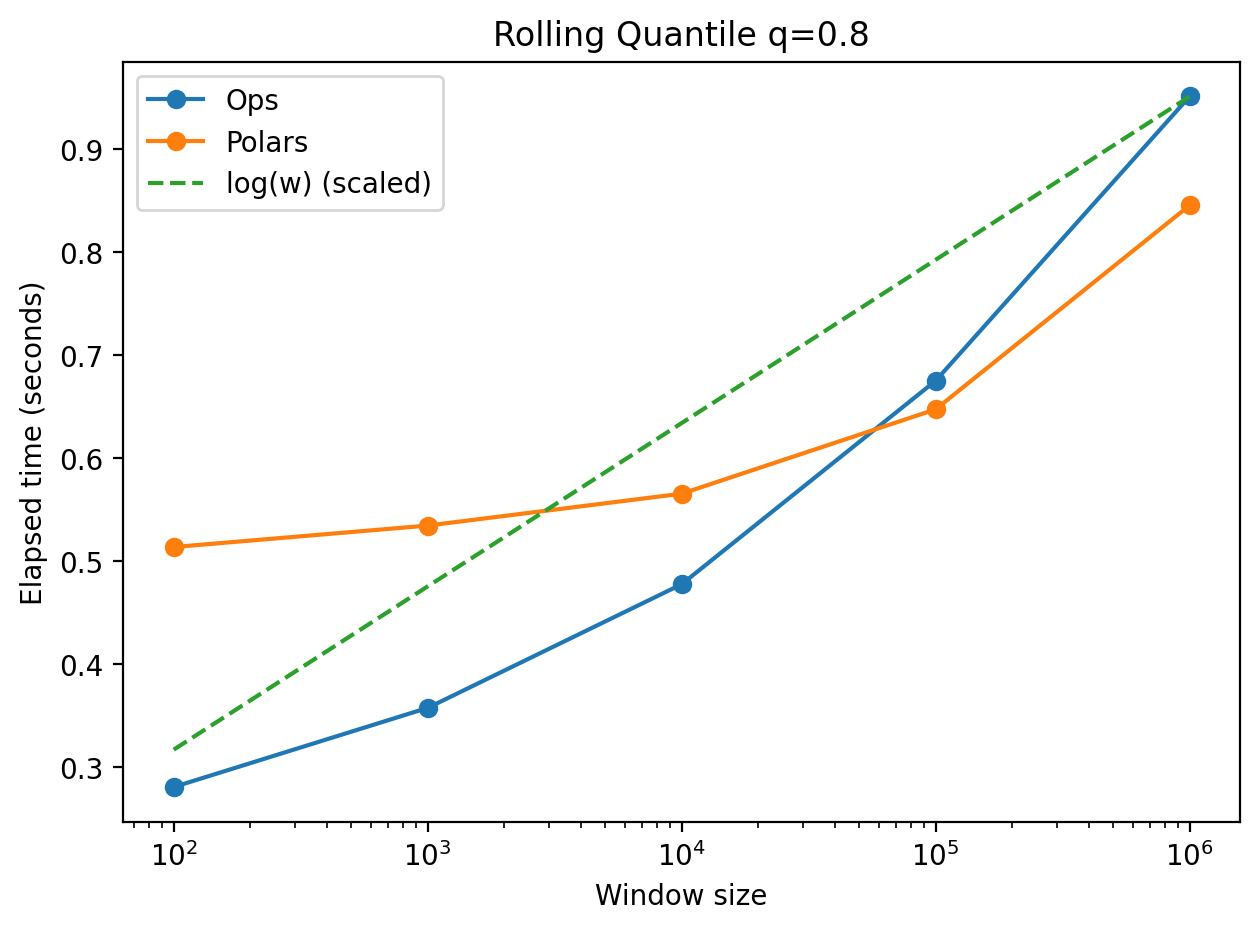

In [10]:
run_benchmark_with_quantile(q=0.8)

Benchmarking Ops: q=0.5
-------------------------
Window size     100: 0.3306 ± 0.0011 seconds
Window size    1000: 0.4613 ± 0.0015 seconds
Window size   10000: 0.6590 ± 0.0103 seconds
Window size  100000: 1.0608 ± 0.0137 seconds
Window size 1000000: 1.6023 ± 0.0998 seconds

Benchmarking Polars: q=0.5
----------------------------
Window size     100: 0.6014 ± 0.0102 seconds
Window size    1000: 0.6148 ± 0.0062 seconds
Window size   10000: 0.6606 ± 0.0017 seconds
Window size  100000: 0.7713 ± 0.0105 seconds
Window size 1000000: 0.9894 ± 0.0398 seconds


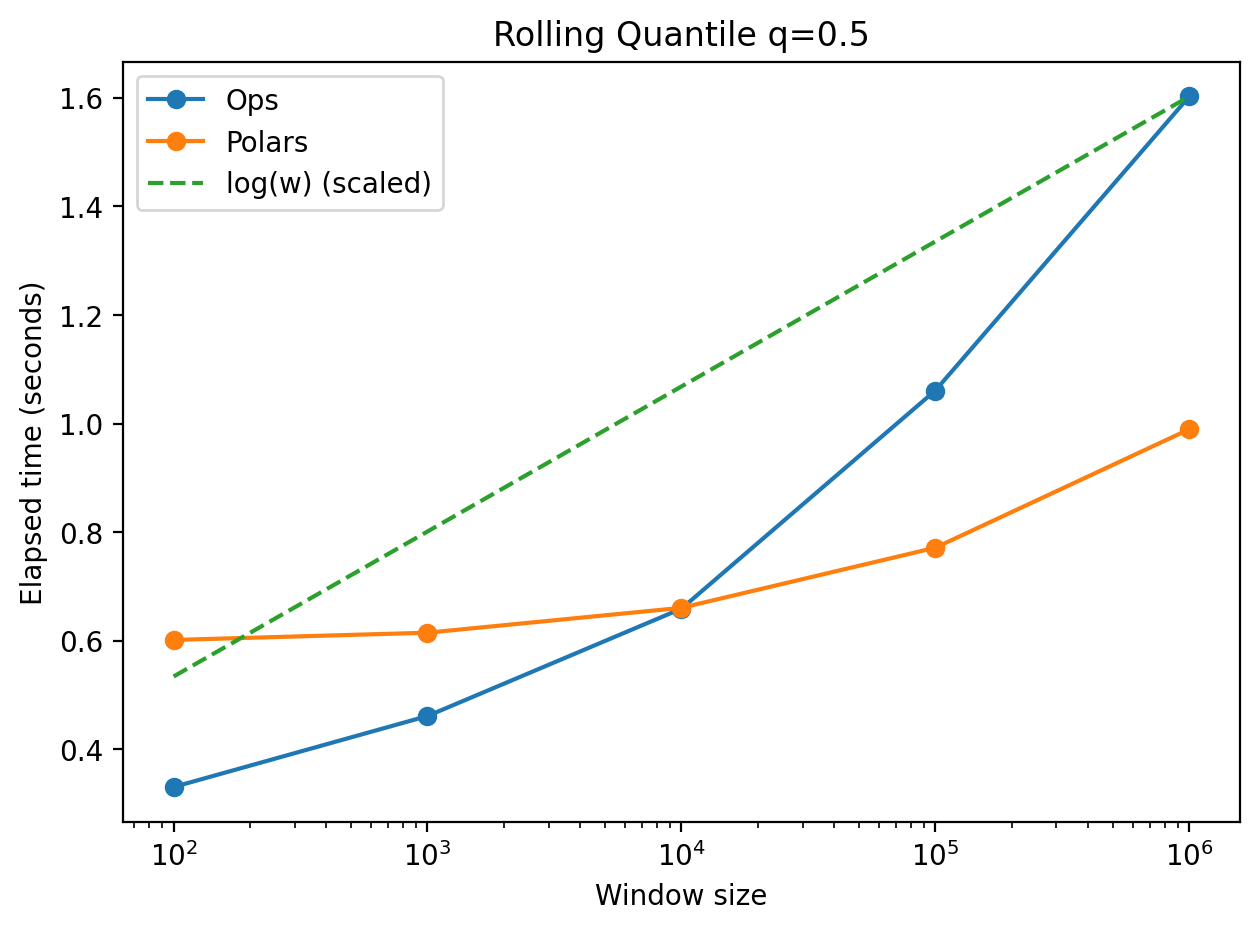

In [11]:
run_benchmark_with_quantile(q=0.5)

Benchmarking Ops: q=0.2
-------------------------
Window size     100: 0.2848 ± 0.0080 seconds
Window size    1000: 0.3582 ± 0.0017 seconds
Window size   10000: 0.4788 ± 0.0157 seconds
Window size  100000: 0.7424 ± 0.0227 seconds
Window size 1000000: 1.0446 ± 0.1178 seconds

Benchmarking Polars: q=0.2
----------------------------
Window size     100: 0.5016 ± 0.0091 seconds
Window size    1000: 0.5235 ± 0.0052 seconds
Window size   10000: 0.5552 ± 0.0073 seconds
Window size  100000: 0.6308 ± 0.0099 seconds
Window size 1000000: 0.7948 ± 0.0551 seconds


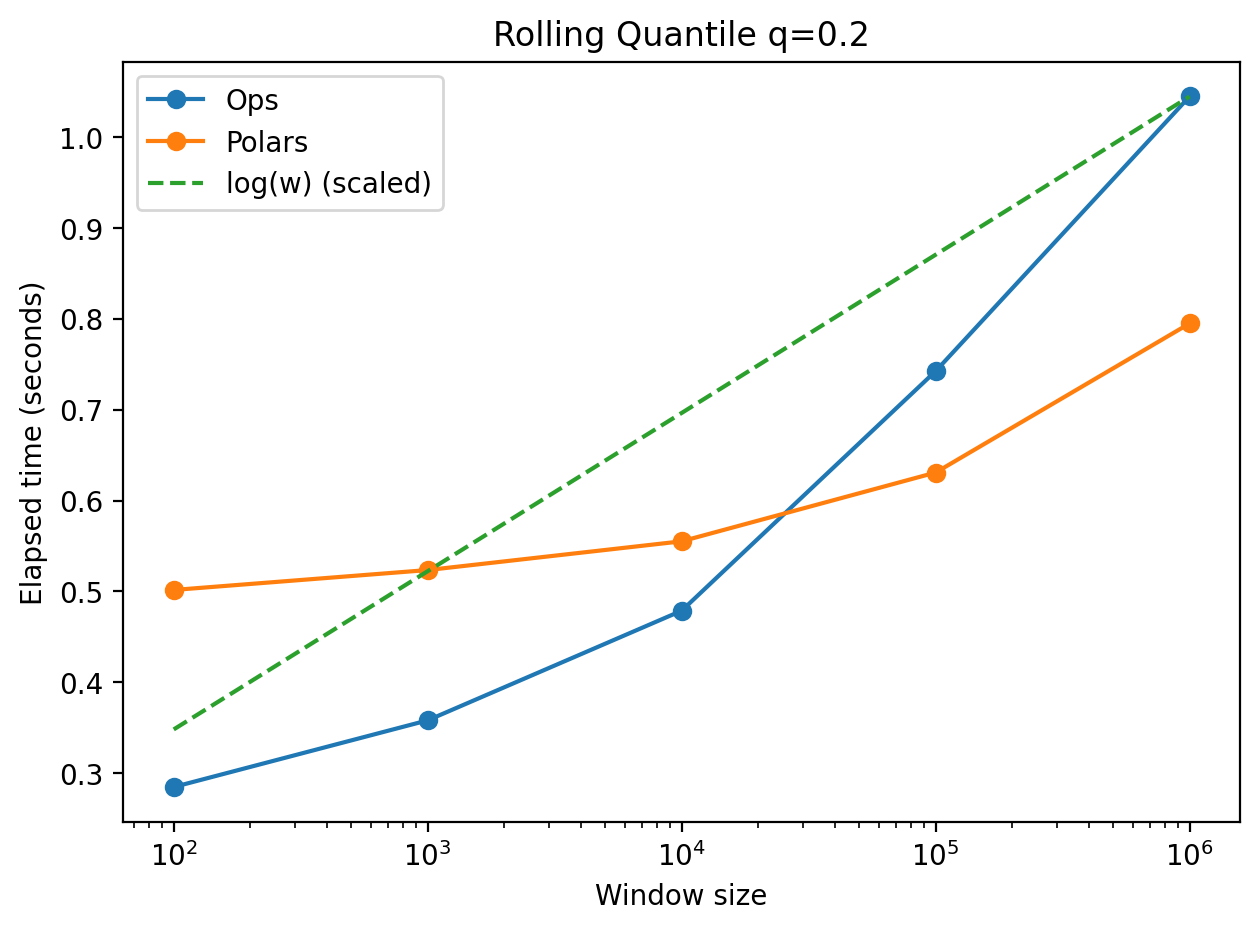

In [12]:
run_benchmark_with_quantile(q=0.2)

Benchmarking Ops: q=0.1
-------------------------
Window size     100: 0.2377 ± 0.0030 seconds
Window size    1000: 0.2797 ± 0.0033 seconds
Window size   10000: 0.3651 ± 0.0045 seconds
Window size  100000: 0.5102 ± 0.0041 seconds
Window size 1000000: 0.6763 ± 0.0722 seconds

Benchmarking Polars: q=0.1
----------------------------
Window size     100: 0.4727 ± 0.0054 seconds
Window size    1000: 0.4919 ± 0.0075 seconds
Window size   10000: 0.5267 ± 0.0099 seconds
Window size  100000: 0.5954 ± 0.0156 seconds
Window size 1000000: 0.7439 ± 0.0464 seconds


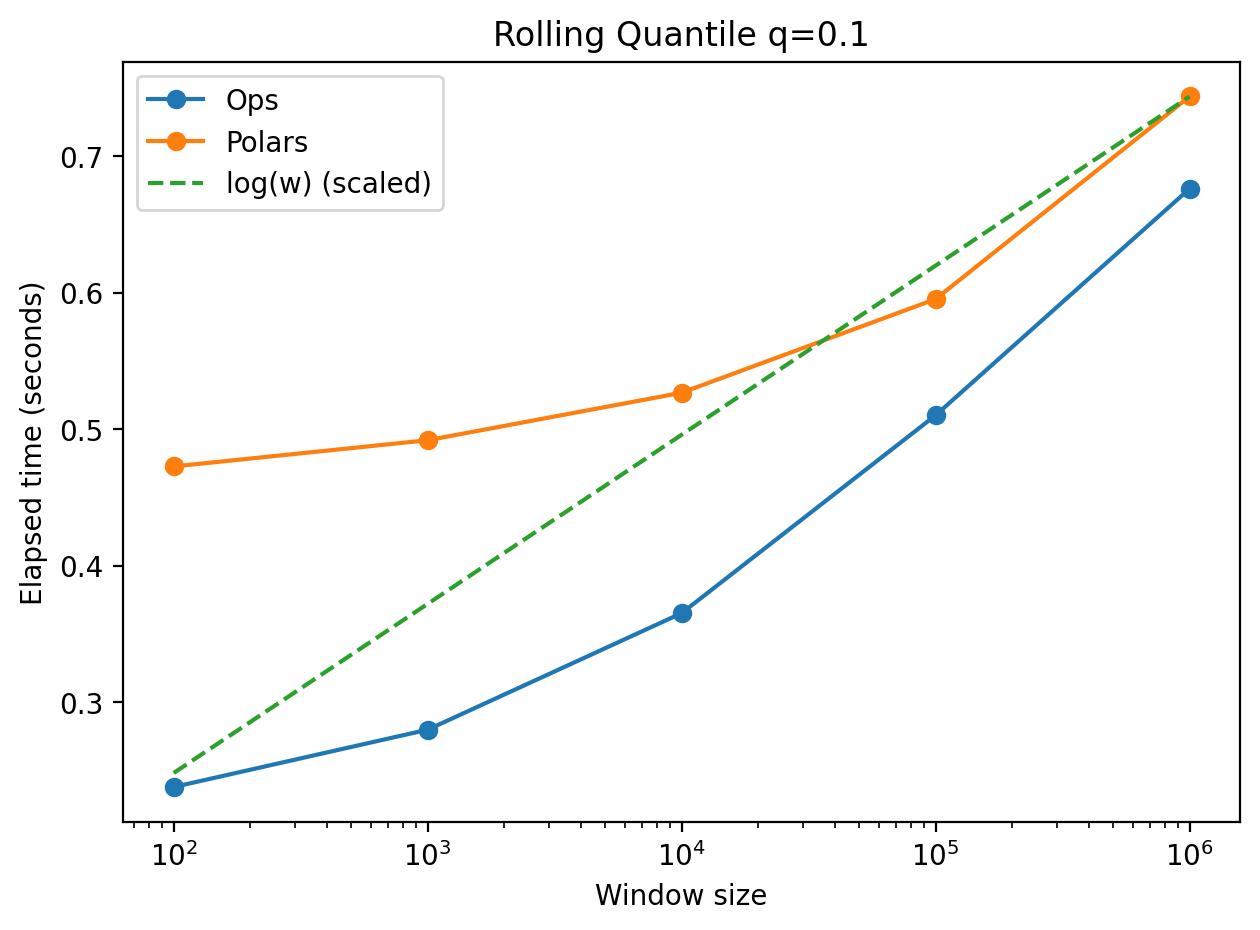

In [13]:
run_benchmark_with_quantile(q=0.1)

Benchmarking Ops: q=0.01
-------------------------
Window size     100: 0.2010 ± 0.0009 seconds
Window size    1000: 0.2124 ± 0.0023 seconds
Window size   10000: 0.2417 ± 0.0031 seconds
Window size  100000: 0.2530 ± 0.0031 seconds
Window size 1000000: 0.2604 ± 0.0196 seconds

Benchmarking Polars: q=0.01
----------------------------
Window size     100: 0.3338 ± 0.0049 seconds
Window size    1000: 0.4571 ± 0.0083 seconds
Window size   10000: 0.4859 ± 0.0042 seconds
Window size  100000: 0.5437 ± 0.0044 seconds
Window size 1000000: 0.6463 ± 0.0029 seconds


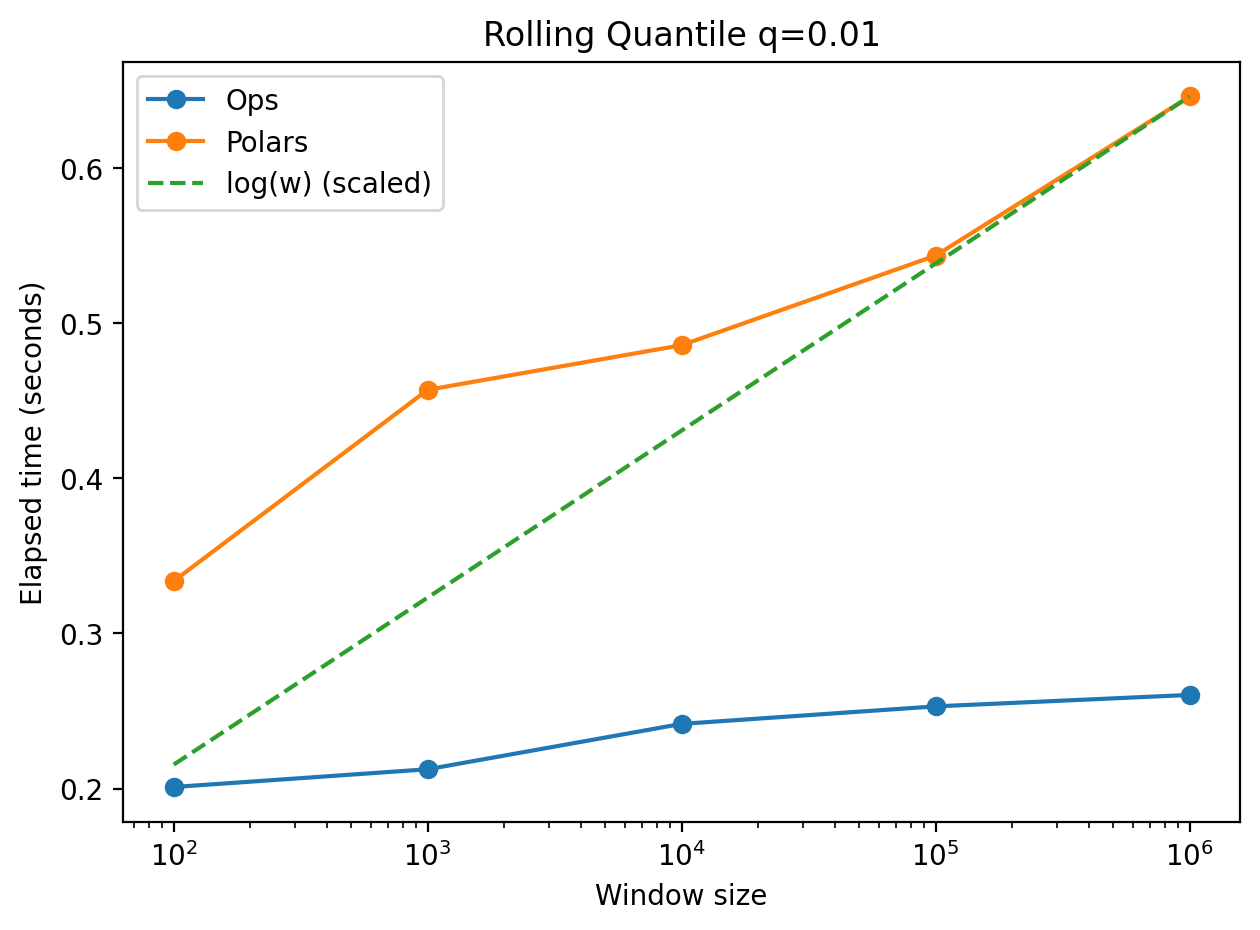

In [14]:
run_benchmark_with_quantile(q=0.01)

Benchmarking Ops: q=0.99
-------------------------
Window size     100: 0.1971 ± 0.0016 seconds
Window size    1000: 0.2063 ± 0.0020 seconds
Window size   10000: 0.2320 ± 0.0021 seconds
Window size  100000: 0.2408 ± 0.0023 seconds
Window size 1000000: 0.2274 ± 0.0013 seconds

Benchmarking Polars: q=0.99
----------------------------
Window size     100: 0.4078 ± 0.0075 seconds
Window size    1000: 0.4535 ± 0.0047 seconds
Window size   10000: 0.4949 ± 0.0102 seconds
Window size  100000: 0.5610 ± 0.0139 seconds
Window size 1000000: 0.6510 ± 0.0049 seconds


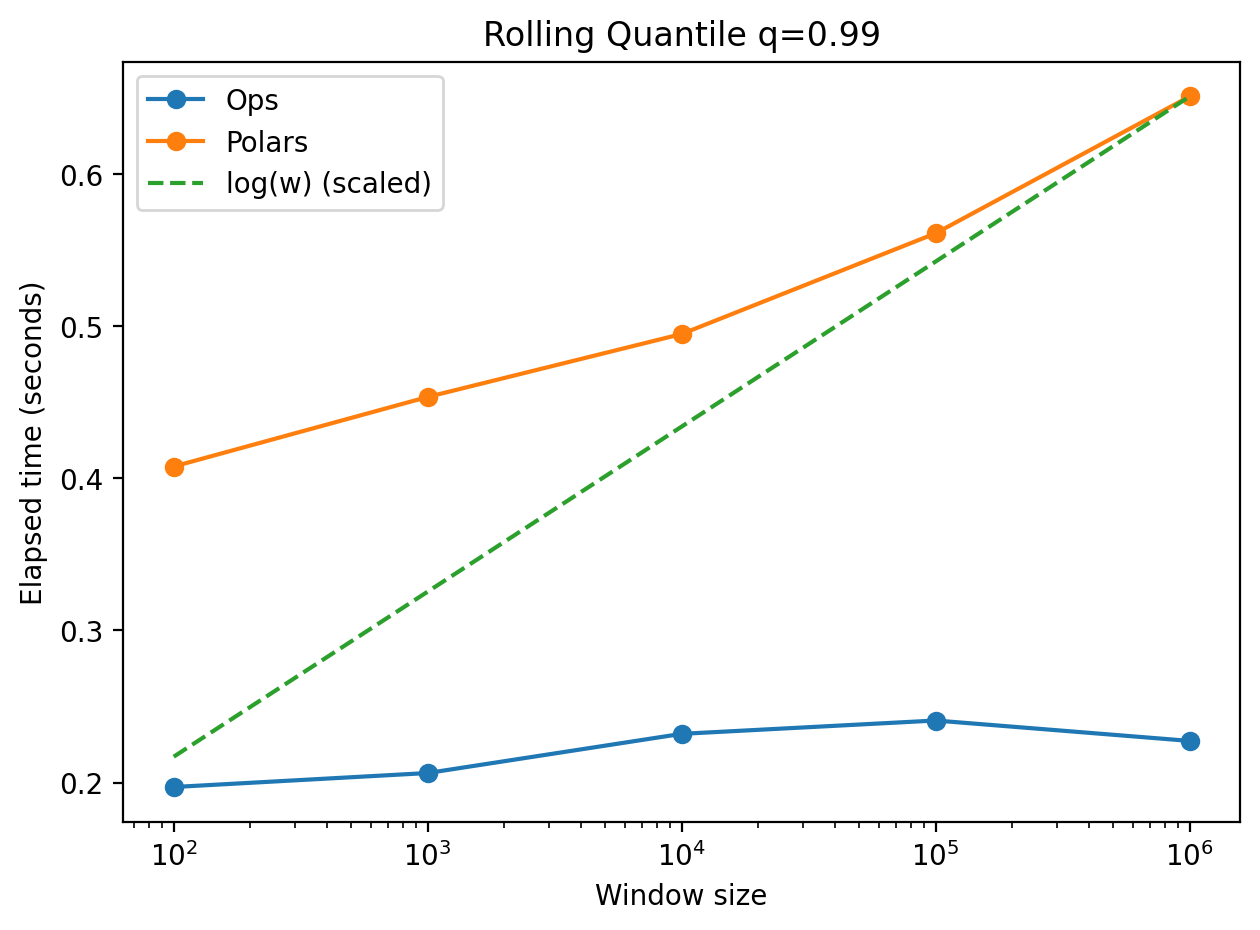

In [15]:
run_benchmark_with_quantile(q=0.99)